# Basit Doğrusal Regresyon - Model Tuning - Model Doğrulama

### Bu veri setindeki öğrenciler farklı yaşlarda ve farklı gelir seviyelerindeki ailelerden geliyorlar. Sınav puanları öğrencilerin yaş ve aile gelirleri ile ilişkili olabilir mi ? Bu soruyu cevaplamak için, basit doğrusal regresyon modeli oluşturacağız.

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [70]:
# veri setinin oluşturulması

data = pd.DataFrame({
    'Age': [15, 16, 17, 18, 19],
    'Income': [20000, 30000, 40000, 50000, 60000],
    'Score': [45, 55, 70, 80, 90]
})

data.head()

,Age,Income,Score
0,15,20000,45
1,16,30000,55
2,17,40000,70
3,18,50000,80
4,19,60000,90


# Veri Setini Tanıma ve Analiz Etme

In [71]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5.0,17.0,1.581139,15.0,16.0,17.0,18.0,19.0
Income,5.0,40000.0,15811.388301,20000.0,30000.0,40000.0,50000.0,60000.0
Score,5.0,68.0,18.234583,45.0,55.0,70.0,80.0,90.0


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     5 non-null      int64
 1   Income  5 non-null      int64
 2   Score   5 non-null      int64
dtypes: int64(3)
memory usage: 248.0 bytes


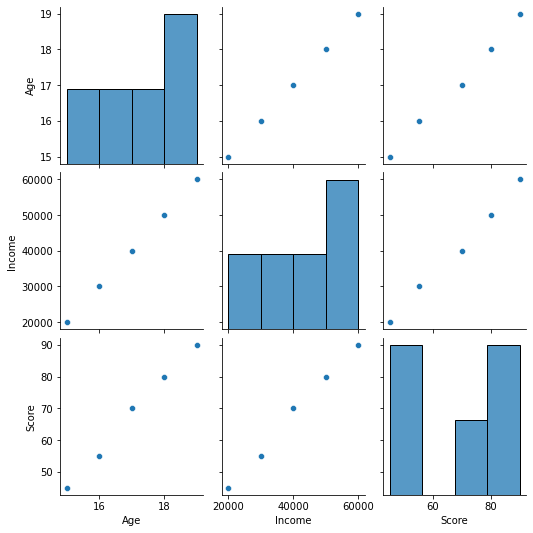

In [73]:
sns.pairplot(data=data);

In [74]:
# eksik değer kontrolü.

data.isnull().sum()

Age       0
Income    0
Score     0
dtype: int64

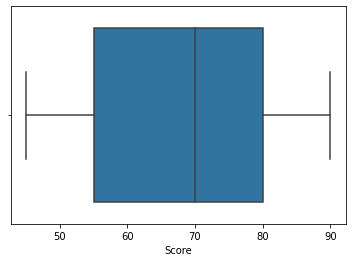

In [75]:
# aykırı değer analizi.

sns.boxplot(data=data, x='Score');

#### Yukarıda veri setimize dair bilgi edinmek için 'describe()' ve 'info()' fonksiyonlarını kullandık. Veri seti içerisindeki değişkenlerin birbirleri ile olan ilişkilerini gözlemleyebilmek için 'sns.pairplot' fonksiyonunu kullandık. Eksik değerleri gözlemledik ve aykırı gözlem analizi yapmak için 'sns.boxplot' fonksiyonunu kullandık. Basit bir veri seti olduğu için bu kısımda yapılması gereken herhangi bir işlem yok.

# Hipotez Testi

#### Şimdi, istatistiksel hipotez testi yapalım. Bu test, yaş ve gelirin sınav puanına etkisinin olup olmadığını kontrol etmek için kullanılabilir.

In [76]:
# bağımlı ve bağımsız değişkenlerimizi oluşturalım.

X = data[['Age', 'Income']]
y = data['Score']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

C:\Users\murat\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     529.0
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           0.000180
Time:                        14:48:09   Log-Likelihood:                -8.1084
No. Observations:                   5   AIC:                             20.22
Df Residuals:                       3   BIC:                             19.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1294      0.012     10.371      0.002       0.090       0.169
Age            1.6824      0.162     10.371      0.002       1.166       2.199
Income         0.0010   6.55e-05     14.985      0.001       0.001       0.001
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.533
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.361
Skew:                           0.408   Prob(JB):                        0.835
Kurtosis:                       1.967   Cond. No.                     1.45e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.29e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### OLS regresyon, bağımsız değişkenlerin bağımlı değişkeni en iyi şekilde açıklayabilmesi için matematiksel bir formül bulmayı amaçlar. Özetinde istatistiksel terimleri barındırır. Ve bilimsel olarak model ve değişkenler hakkında bize bilgi verir. R-kare değeri, f-istatistik değeri, katsayılar, sabit, p-value değeri gibi hayati öneme sahip verileri gözlemleme şansını elde ederiz.

### Model özetinde, yaşın ve gelirin sınav puanına etkisinin olduğu görülür. Yaşın sınav puanına etkisi, gelirden daha düşüktür.

# Model Tuning ve Model Doğrulama İşlemleri

#### Model tuning, modelimizin hiperparametrelerini ayarlamak için kullanılır. Basit doğrusal regresyon modeli için bir hiperparametre yoktur, ancak öğrencinin yaş ve gelir değerleri gibi girdi değişkenlerini normalleştirerek model performansını arttırabiliriz. Bu normalizasyon işlemi, verilerimizdeki değişkenler arasındaki ölçek farklılıklarını azaltarak, modelin daha iyi genelleştirilmesine yardımcı olabilir.

In [85]:
# normalizasyon modelini oluşturma ve eğitme.
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Model doğrulama işlemi, modelimizin gerçek dünya verilerinde nasıl performans gösterdiğini kontrol etmek için kullanılır. Bu işlem için, veri setimizi eğitim ve test verisi olarak ayırmamız gerekiyor. Eğitim verisi, modelimizi öğrenmek için kullanılacak verileri içerirken, test verisi modelimizin doğruluğunu kontrol etmek için kullanılacak verileri içerir. Veri setimiz küçük olduğu için, verilerin %70 'ini eğitim verisi, %30 'sini test verisi olarak ayırabiliriz.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [79]:
# model oluşturma ve eğitme

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [80]:
# tahmin.
y_pred = model.predict(X_test)

In [81]:
# modelin doğruluğunu test verisi üzerinde test etme.
r2 = r2_score(y_test, y_pred)
print('R-kare değeri: ', r2)

R-kare değeri:  0.9673469387755101


### R-kare değerine bakarak, bağımsız değişkenlerimizin bağımlı değişkeni başarılı bir şekilde açıklayabildiğini söyleyebiliriz.

In [83]:
df = pd.DataFrame({
    'Gerçek Değerler': y_test,
    'Tahmin Değerleri': y_pred[0:2]
})

df

,Gerçek Değerler,Tahmin Değerleri
2,70,67.142857
0,45,43.571429
